In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_set = pd.read_csv('train_clean.csv')
train_set.head()

,PCR_01,PCR_04,PCR_02,PCR_05,PCR_06,PCR_08,PCR_10,PCR_09,sugar_levels,sport_activity,symptom_shortness_of_breath,symptom_sore_throat,symptom_cough,covid_score,symptom_fever,spread_score,blood_type
0,0.563699,0.361760,0.643931,0.252795,0.536282,0.849764,0.607990,0.383910,-0.598615,1.00,0,0,0,-0.882347,1,41.613736,O+
1,0.937373,0.262464,0.490661,0.456612,0.832887,0.589628,0.674511,0.594236,-0.429920,0.25,0,0,0,-1.177741,1,-128.684403,A+
2,0.368002,0.296824,0.367240,0.521415,0.103104,0.271534,0.655058,0.676345,1.706886,0.00,0,0,0,-1.166982,0,37.332799,O+
3,0.594723,0.706008,0.153807,0.477596,0.253433,0.800841,0.206941,-0.375981,1.257032,0.00,0,0,0,11.123661,0,87.011427,O+
4,0.126754,0.873489,0.407132,0.873358,0.751054,0.649924,0.640837,-0.197962,-0.936005,0.00,0,0,0,-0.650897,1,57.303844,A-


<AxesSubplot:xlabel='covid_score', ylabel='Density'>

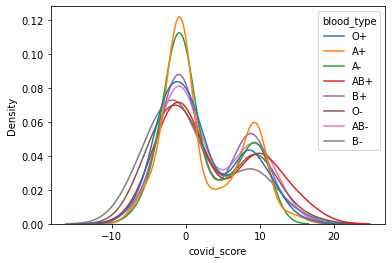

In [32]:
sns.kdeplot(data=train_set, x='covid_score',
hue='blood_type', common_norm=False)

In [33]:
def convert_to_groups(x):
    if x == "O+" or x == "O-":
        return "O"
    elif x=="B+" or x == "B-":
        return "B"
    else:
        return "Others"

In [34]:
train_set['blood_type'] = (train_set['blood_type'].apply(convert_to_groups))

<AxesSubplot:xlabel='covid_score', ylabel='Density'>

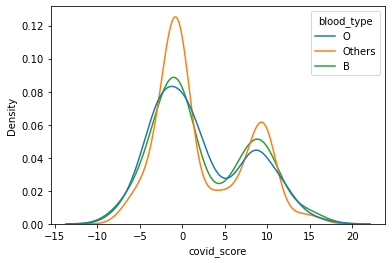

In [35]:
sns.kdeplot(data=train_set, x='covid_score',
hue='blood_type', common_norm=False)

In [36]:
train_set = pd.get_dummies(train_set, columns=['blood_type'], prefix=['blood'])

PART 2

In [37]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np


class LinearRegressor(BaseEstimator, RegressorMixin):
    """
    Custom linear regression model
    """
    def __init__(self, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param lr: the SGD learning rate (step size)
        """
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.zeros(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, X, y):
        """
        Compute the MSE objective loss.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the linear regression objective loss (float scalar)
        """
        m = len(y)
        Xw = np.array(X.dot(w.T))
        vector_b =  np.array(([b] * m)).reshape(-1)
        in_the_norm = np.array(Xw + vector_b - y)
        after_norm = in_the_norm.dot(in_the_norm)



        # TODO: complete the loss calculation
        loss = after_norm / m

        return loss

    @staticmethod
    def gradient(w, b: float, X, y):
        """
        Compute the (analytical) linear regression objective gradient.

        :param w: weight vector for linear regression; array of shape (n_features,)
        :param b: bias scalar for linear regression
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical gradient w.r.t w and b
        m = len(y)
        Xw =np.array(X.dot(w))
        vector_b =  np.array(([b] * m)).reshape(-1)
        brackets = Xw + vector_b - np.array(y)
        g_w = 2 / m * X.T.dot(brackets)
        g_b = 2 / m * np.sum(brackets,axis=0)

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 1000, keep_losses: bool = True,
                      X_val  =None, y_val = None):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses: should compute the train & val losses during training?
        :param X_val: validation samples to compute the loss for (for logs only)
        :param y_val: validation labels to compute the loss for (for logs only)
        :return: training and validation losses during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        train_losses = []
        val_losses = []

        if keep_losses:
            train_losses.append(self.loss(self.w, self.b, X, y))
            val_losses.append(self.loss(self.w, self.b, X_val, y_val))

        # Iterate over batches (SGD)
        for itr in range(0, max_iter):
            start_idx = (itr * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            # TODO: Compute the gradient for the current *batch*
            g_w, g_b = self.gradient(self.w , self.b , batch_X , batch_y)

            # Perform a gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - g_w * self.lr
            self.b = self.b - g_b * self.lr

            if keep_losses:
                train_losses.append(self.loss(self.w, self.b,  X, y))
                val_losses.append(self.loss(self.w, self.b,  X_val, y_val))

        return train_losses, val_losses

    def fit(self, X, y, max_iter: int = 1000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Regress labels on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted continuous labels for samples in X; array of shape (n_samples,)
        """

        # TODO: Compute
        y_pred = X * self.w + self.b

        return y_pred

In [38]:
def numerical_subgradient(w, b, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = LinearRegressor.loss(w_, b, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = LinearRegressor.loss(w_, b, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (LinearRegressor.loss(w_, b + delta, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=10, figsize=(10, 6)):
    residual_means_w = []
    residual_means_b = []

    for delta in deltas:
        residuals_w = []
        residuals_b = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad_w, analytic_grad_b = LinearRegressor.gradient(w, b, X, y)

            numeric_grad_w, numeric_grad_b = numerical_subgradient(w, b, X, y, delta=delta)

            residual_w = np.linalg.norm(numeric_grad_w - analytic_grad_w)
            residuals_w.append(residual_w)

            residual_b = np.linalg.norm(numeric_grad_b - analytic_grad_b)
            residuals_b.append(residual_b)

        residual_means_w.append(np.mean(residuals_w))
        residual_means_b.append(np.mean(residuals_b))

    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16, 8))
    plt.suptitle('Residuals of analytical and numerical gradients',
                 fontsize=22, fontweight="bold")
    axs[0].set_title(r'Residuals of $\nabla_{w}L\left(w,b\right)$')
    axs[1].set_title(r'Residuals of $\frac{\partial}{\partial{b}}L\left(w,b\right)$')
    axs[0].plot(deltas, residual_means_w, linewidth=3)
    axs[1].plot(deltas, residual_means_b, linewidth=3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[0].set_xlabel('$\delta_w$', fontsize=18)
    axs[1].set_xlabel('$\delta_b$', fontsize=18)
    axs[0].set_ylabel(r'$\left\Vert \nabla_{w}L\left(w,b\right) - u_{\delta_w} \left(w,b\right)\right\Vert$',
                      fontsize=18)
    axs[1].set_ylabel(
        r'$\left\Vert \frac{\partial}{\partial{b}}L\left(w,b\right) - u_{\delta_b} \left(w,b\right)\right\Vert$',
        fontsize=18)

    axs[0].grid(alpha=0.5)
    axs[1].grid(alpha=0.5)
    plt.show()


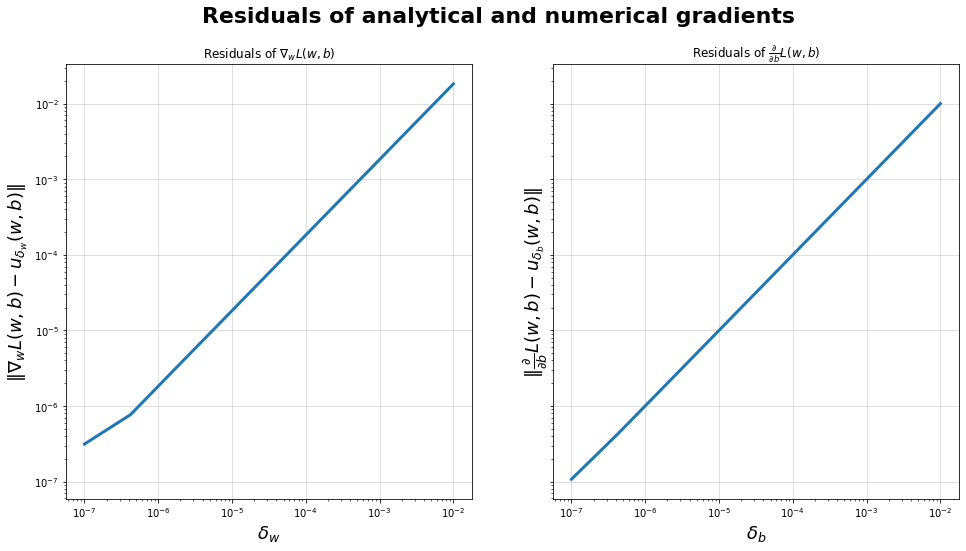

In [39]:
from sklearn.model_selection import train_test_split
yoav_id = '212617864'
mor_id = '211810452'
random_state = int(yoav_id[-1]) + int(yoav_id[-2]) + int(mor_id[-1]) + int(mor_id[-2])
train_subset , test_subset = train_test_split(train_set, test_size=0.2, random_state=random_state)
x_train_subset = train_subset.drop(['covid_score','spread_score'],axis=1)
y_train_subset = train_subset['covid_score']


compare_gradients(x_train_subset, y_train_subset, deltas=np.logspace(-7, -2, 9))


In [40]:
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-9, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)
  
  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 1e-09, Best train loss = 34.225793463705465, Best validation loss = 36.80731785302816
lr size = 1e-08, Best train loss = 34.22448111611063, Best validation loss = 36.80578751519497
lr size = 1e-07, Best train loss = 34.2113685206058, Best validation loss = 36.790496285597335
lr size = 1e-06, Best train loss = 34.08132323851129, Best validation loss = 36.638790965281785
lr size = 1e-05, Best train loss = 32.88193405288609, Best validation loss = 35.23492259733071
lr size = 0.0001, Best train loss = 26.537565318580818, Best validation loss = 27.681368959778748
lr size = 0.001, Best train loss = 11.822681898278763, Best validation loss = 12.273992148658929
lr size = 0.01, Best train loss = 3.3061298365467815, Best validation loss = 4.27422618989348
lr size = 0.1, Best train loss = 3.204371288533879, Best validation loss = 4.20405170627845


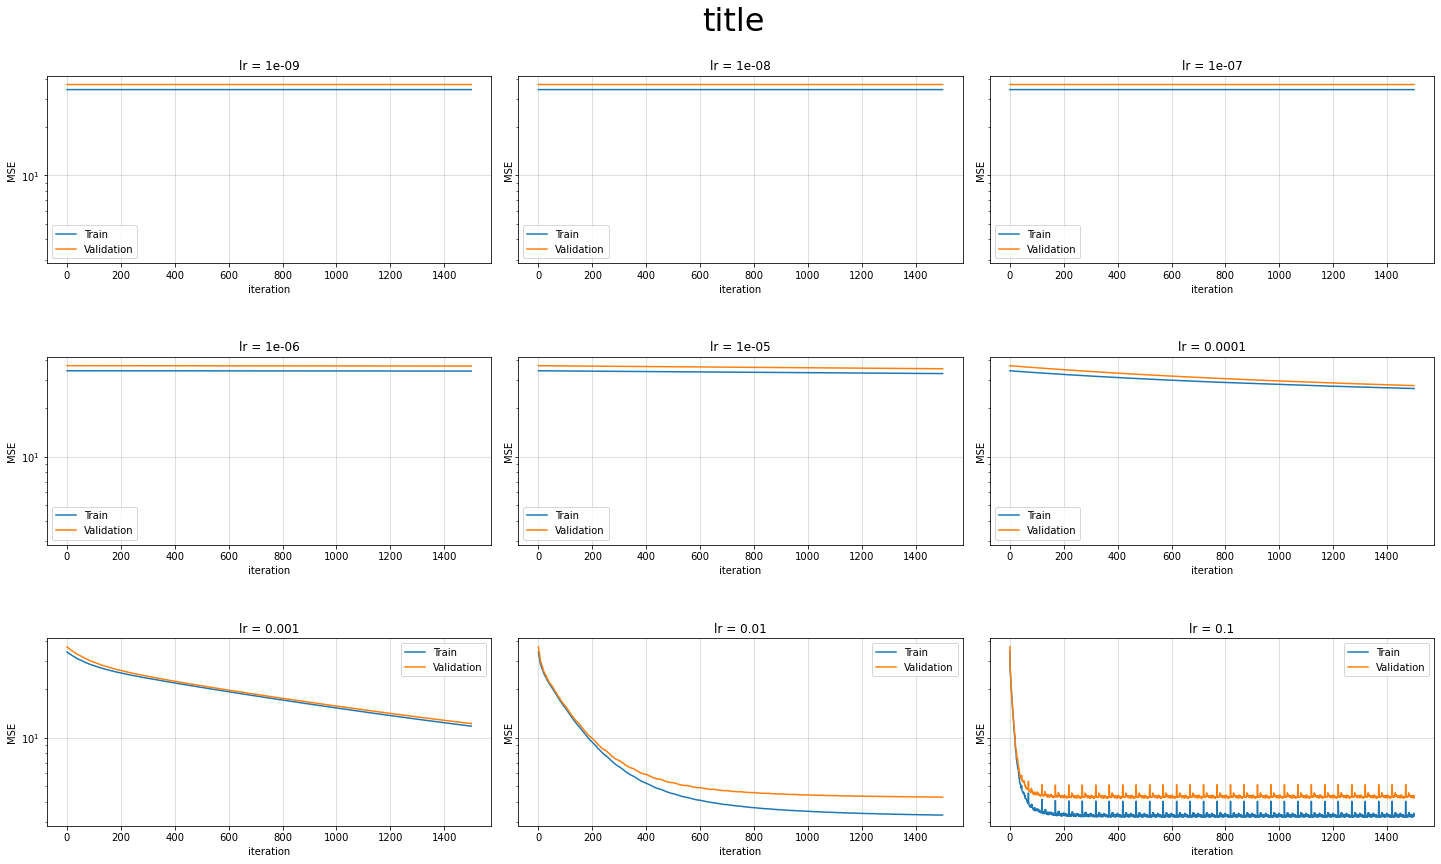

In [42]:
x_validation = test_subset.drop(['covid_score','spread_score'],axis=1)
y_validation = test_subset['covid_score']
test_lr(x_train_subset, y_train_subset, x_validation, y_validation,"title") #im not sure about the validation set

we can see that the best lr is between 0.001 and 0.1 

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def test_lr(X_train, y_train, X_val, y_val, title:str, max_iter = 1500):
  lr_list = np.logspace(-3, -1, 9)

  fig, axs = plt.subplots(3, 3, sharey=True, figsize=(20, 12))
  plt.suptitle(title, fontsize=32)
  plt.tight_layout()
  fig.subplots_adjust(hspace=0.5, top=0.9)
  
  axs = np.ravel(axs)
  for i, lr in enumerate(lr_list):
    cur_linear_reggressor = LinearRegressor(lr)
    train_losses, val_losses = cur_linear_reggressor.fit_with_logs(X_train, y_train, keep_losses=True, X_val=X_val, y_val=y_val, max_iter = max_iter)
    print('lr size = '+str(lr)+', Best train loss = '+str(min(train_losses))+', Best validation loss = '+str(min(val_losses)))

    iterations = np.arange(max_iter + 1)
    axs[i].semilogy(iterations, train_losses, label="Train")
    axs[i].semilogy(iterations, val_losses, label="Validation")
    axs[i].grid(alpha=0.5)
    axs[i].legend()
    axs[i].set_title('lr = '+str(lr))
    axs[i].set_xlabel('iteration')
    axs[i].set_ylabel('MSE')

lr size = 0.001, Best train loss = 11.822681898278763, Best validation loss = 12.273992148658929
lr size = 0.0017782794100389228, Best train loss = 7.335511440110209, Best validation loss = 7.893776825564409
lr size = 0.0031622776601683794, Best train loss = 4.644261518349983, Best validation loss = 5.375564983354561
lr size = 0.005623413251903491, Best train loss = 3.623677888179793, Best validation loss = 4.510358101355632
lr size = 0.01, Best train loss = 3.3061298365467815, Best validation loss = 4.27422618989348
lr size = 0.01778279410038923, Best train loss = 3.222562466744333, Best validation loss = 4.217393226099753
lr size = 0.03162277660168379, Best train loss = 3.2026479022727745, Best validation loss = 4.20705717219136
lr size = 0.05623413251903491, Best train loss = 3.197404978019623, Best validation loss = 4.199419036700346
lr size = 0.1, Best train loss = 3.204371288533879, Best validation loss = 4.20405170627845


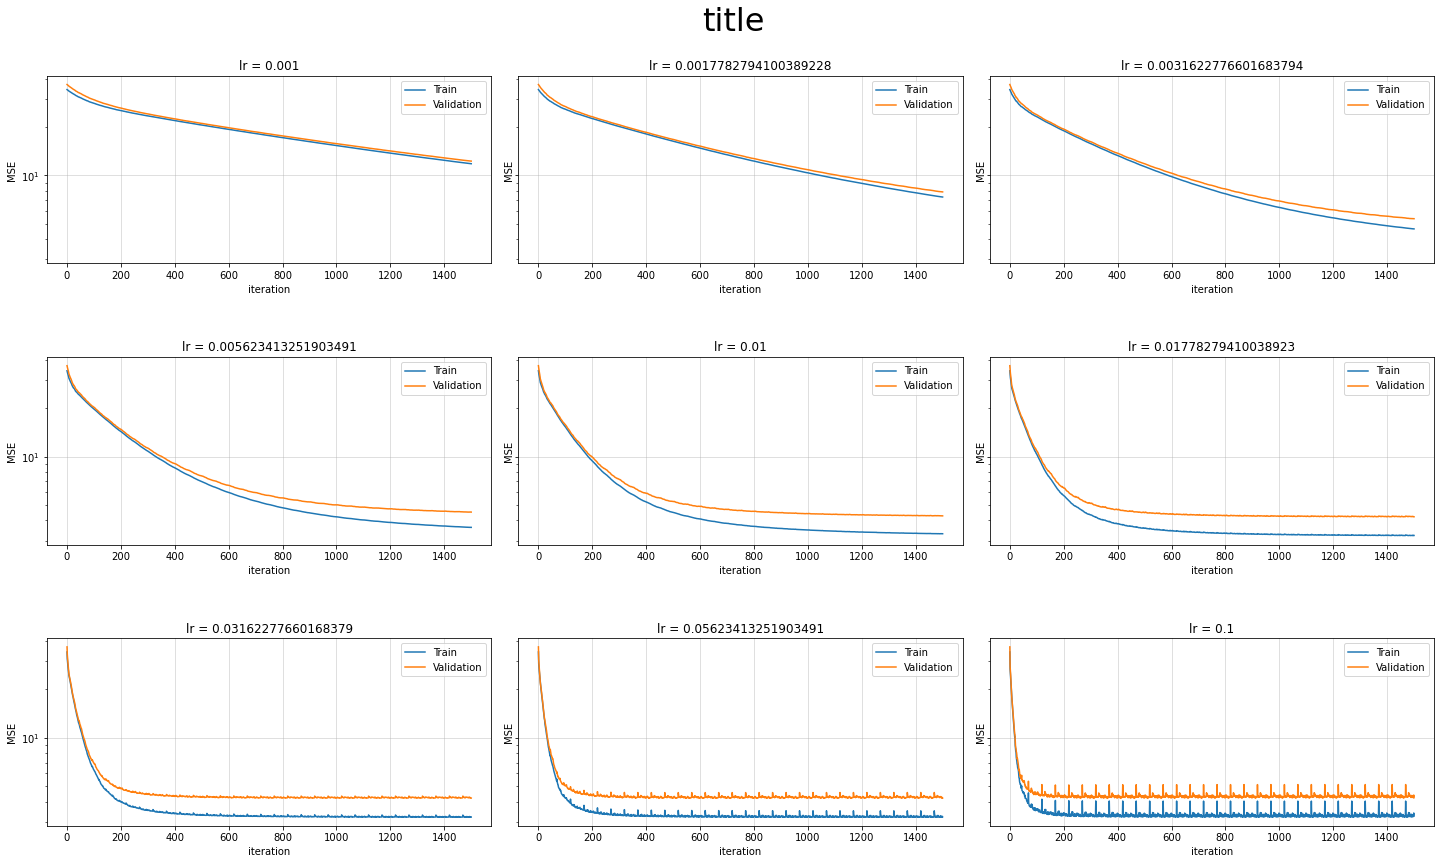

In [44]:
test_lr(x_train_subset, y_train_subset, x_validation, y_validation,"title") #im not sure about the validation set